# Nighttime Lights in Myanmar


**Data & Methodology Note:**


This notebook uses VIIRS Nighttime Lights Collection 2 monthly and annual products. For all analyses and visualizations where the year 2025 is shown, monthly data are aggregated to the annual level to ensure completeness, as the official annual product for 2025 may not be available yet. All other years use the official annual product where possible.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from pathlib import Path
import os
import glob
from wbpyplot import wb_plot

In [249]:
# Import visualization functions
import sys
%load_ext autoreload
%autoreload 2  
#sys.path.append('../../../src/')
from visuals import *
import pandas as pd
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
DATA_FOLDER = Path('../../../data/')
NTL_FOLDER = DATA_FOLDER / 'ntl'/'collection2'
print(NTL_FOLDER)

../../../data/ntl/collection2


In [268]:
ntl_annual_adm0 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'annual/*adm0_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm0 = pd.concat([ntl_annual_adm0, df], ignore_index=True)

ntl_annual_adm1 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'annual/*adm1_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm1 = pd.concat([ntl_annual_adm1, df], ignore_index=True)

ntl_annual_adm2 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'annual/*adm2_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm2 = pd.concat([ntl_annual_adm2, df], ignore_index=True)

ntl_annual_adm3 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'annual/*adm3_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm3 = pd.concat([ntl_annual_adm3, df], ignore_index=True)

ntl_annual_adm4 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'annual/*adm4_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm4 = pd.concat([ntl_annual_adm4, df], ignore_index=True)

ntl_monthly_adm0 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'monthly/*adm0_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm0 = pd.concat([ntl_monthly_adm0, df], ignore_index=True)

ntl_monthly_adm1 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'monthly/*adm1_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm1 = pd.concat([ntl_monthly_adm1, df], ignore_index=True)

ntl_monthly_adm2 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / 'monthly/*adm2_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm2 = pd.concat([ntl_monthly_adm2, df], ignore_index=True)

# ntl_monthly_adm3 = pd.DataFrame()

# for file in glob.glob(str(NTL_FOLDER / '*adm3_monthly*.csv')):
#     df = pd.read_csv(file)
#     ntl_monthly_adm3 = pd.concat([ntl_monthly_adm3, df], ignore_index=True)

# ntl_monthly_adm4 = pd.DataFrame()

# for file in glob.glob(str(NTL_FOLDER / '*adm4_monthly*.csv')):
#     df = pd.read_csv(file)
#     ntl_monthly_adm4 = pd.concat([ntl_monthly_adm4, df], ignore_index=True)


ntl_annual_adm0.drop_duplicates(subset=['date'], inplace=True)
ntl_annual_adm1.drop_duplicates(subset=['date', 'ADM1_PCODE'],inplace=True)
ntl_annual_adm2.drop_duplicates(subset=['date', 'ADM2_PCODE'],inplace=True)
# ntl_annual_adm3.drop_duplicates(subset=['date', 'ADM3_PCODE'], inplace=True)
# ntl_annual_adm4.drop_duplicates(subset=['date', 'ADM3_PCODE', 'ADM4_PCODE'], inplace=True)

ntl_monthly_adm0.drop_duplicates(subset=['date'], inplace=True)
ntl_monthly_adm1.drop_duplicates(subset=['date', 'ADM1_PCODE'], inplace=True)
ntl_monthly_adm2.drop_duplicates(subset=['date', 'ADM2_PCODE'],inplace=True)
# ntl_monthly_adm3.drop_duplicates(subset=['date', 'ADM3_PCODE'], inplace=True)
# ntl_monthly_adm4.drop_duplicates(subset=['date', 'ADM3_PCODE', 'ADM4_PCODE'], inplace=True)


/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_41341/57468934.py:28: DtypeWarning: Columns (4,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [265]:
ntl_ind_monthly = pd.read_csv(NTL_FOLDER / 'processed/mmr_adm_ind_monthly_sum_mean.csv')
#ntl_ind_monthly

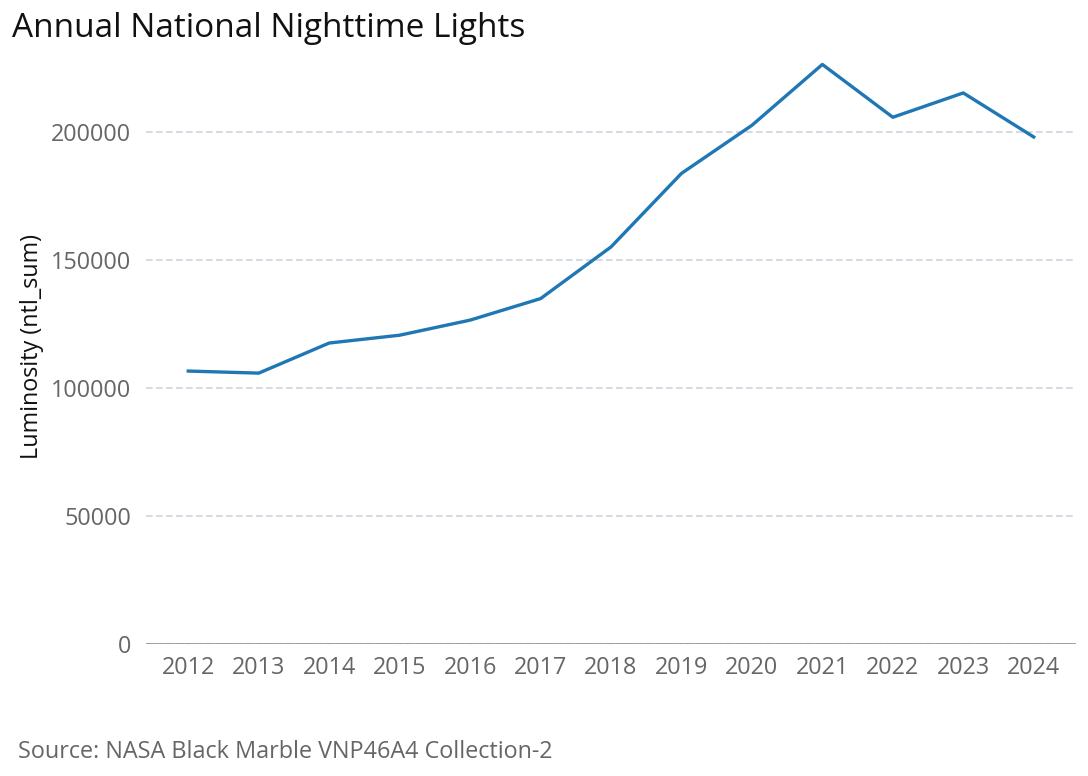

In [270]:
import visuals
visuals.plot_line_chart(
    df=ntl_annual_adm0,
    x_col='year',
    value_col='ntl_sum',
    title='Annual National Nighttime Lights',
    source_text='Source: NASA Black Marble VNP46A4 Collection-2',
    xlabel='Year',
    ylabel='Luminosity (ntl_sum)',
    date_col='date',
    marker=None
)

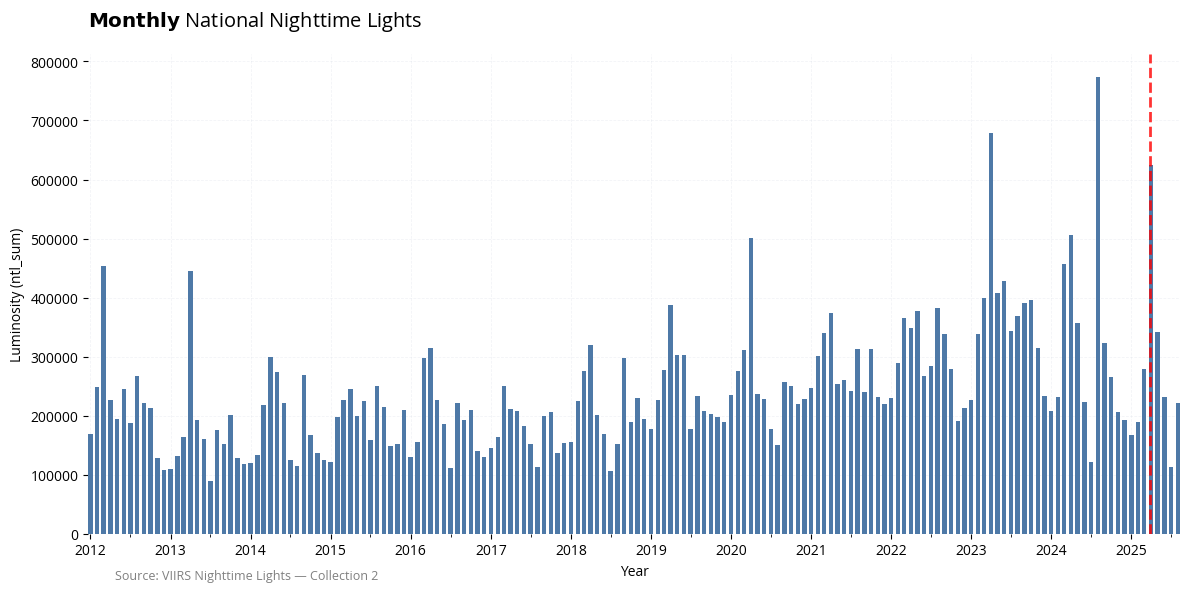

In [271]:
plot_bar_chart(
    df=ntl_monthly_adm0,
    x_col='date',
    value_col='ntl_sum',
    title='Monthly National Nighttime Lights',
    xlabel='Year',
    ylabel='Luminosity (ntl_sum)',
    earthquake_marker='2025-03-25',
    date_col='date',
    bar_width=20
)

In [272]:
# Quick usage examples (optional)
# Set your desired baseline year or range here
user_baseline_year = 2022
# Optionally set a specific current year (None -> uses max available year)
user_current_year = 2024

# Annual baseline vs current percentage change (single baseline year)

# Prefer a date column if available to derive year
date_cand_ann = 'date' if 'date' in ntl_annual_adm0.columns else None

# Annual baseline vs current percentage change (baseline range mean)
annual_pct_range = annual_ntl_pct_change(
    ntl_annual_adm0,
    year_col='year',
    value_col='ntl_sum',
    date_col=date_cand_ann,
    baseline_year=user_baseline_year,
    current_year=user_current_year,
    mode='baseline'
)

# Annual YoY per-year changes
annual_yoy = annual_ntl_pct_change(
    ntl_annual_adm0,
    year_col='year',
    value_col='ntl_sum',
    date_col=date_cand_ann,
    mode='yoy'
)

user_baseline_year = 2024
user_current_year = 2025

monthly_ntl_baseline = monthly_ntl_yoy(
    ntl_monthly_adm0,
    date_col='date',
    value_col='ntl_sum',
    baseline_year=user_baseline_year
)

monthly_yoy = monthly_ntl_yoy(
    ntl_monthly_adm0,
    date_col='date',
    value_col='ntl_sum',
    baseline_year=user_baseline_year
)


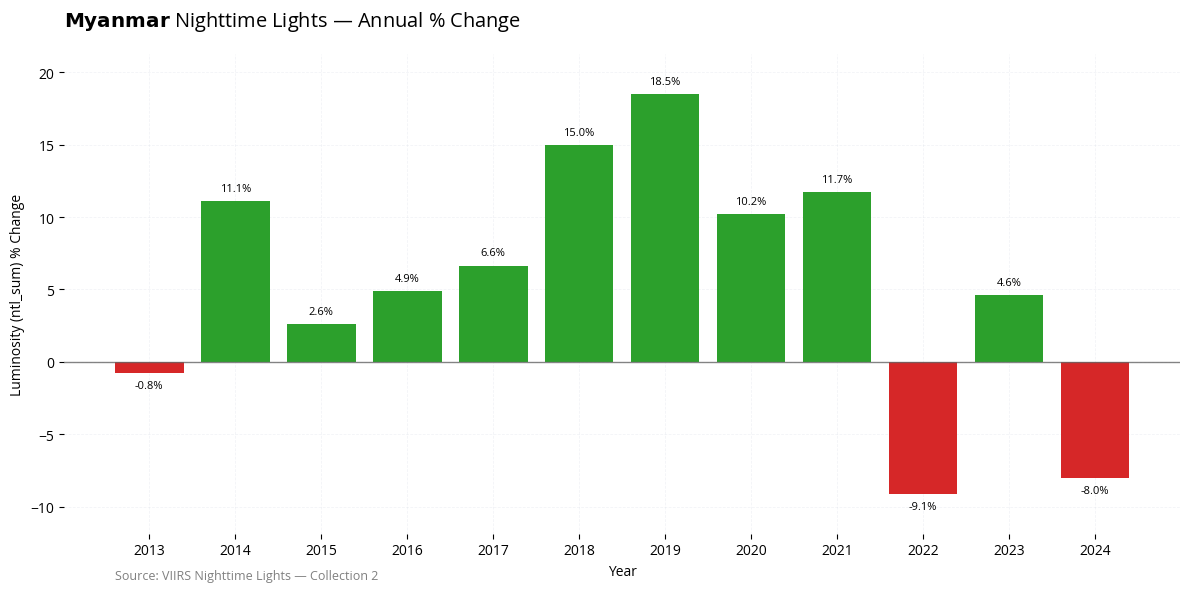

In [273]:
plot_bar_chart(
    df=annual_yoy,
    x_col='year',  # Use year column directly instead of date
    value_col='pct_change',
    title='Myanmar Nighttime Lights — Annual % Change',
    xlabel='Year',
    ylabel='Luminosity (ntl_sum) % Change',
    earthquake_marker='2025-03-25',
    date_col=None,  # No date column needed
    bar_width=0.8,  # Use relative width instead of absolute
    is_percentage=True,
)

In [274]:
ntl_monthly_adm0['date'] = pd.to_datetime(ntl_monthly_adm0['date'])
ntl_monthly_adm0['year_col'] = ntl_monthly_adm0['date'].dt.year
ntl_comparison = ntl_monthly_adm0[ntl_monthly_adm0['year_col'].isin([2024, 2025])]
ntl_comparison['year_col'] = ntl_comparison['year_col'].astype(str)
ntl_comparison['month'] = ntl_comparison['date'].dt.month

/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_41341/2195092543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ntl_comparison['year_col'] = ntl_comparison['year_col'].astype(str)
/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_41341/2195092543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ntl_comparison['month'] = ntl_comparison['date'].dt.month


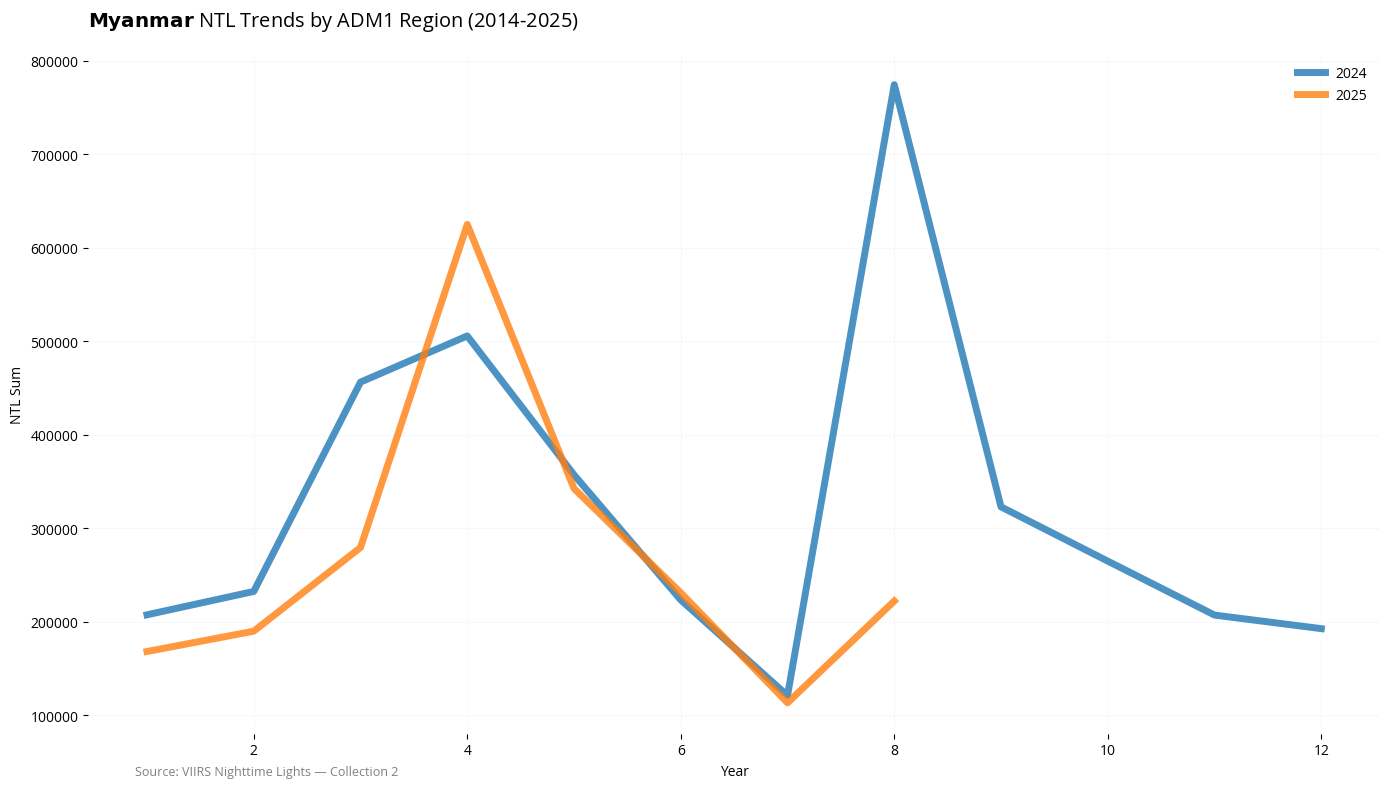

In [275]:
plot_comparative_lines(
    df=ntl_comparison,
    x_col='month',
    value_col='ntl_sum',
    group_col='year_col',
    title='Myanmar NTL Trends by ADM1 Region (2014-2025)',
    xlabel='Year',
    ylabel='NTL Sum',
    date_col='date',
    figsize=(14, 8),
    linewidth=5,
    marker_size=0,
)

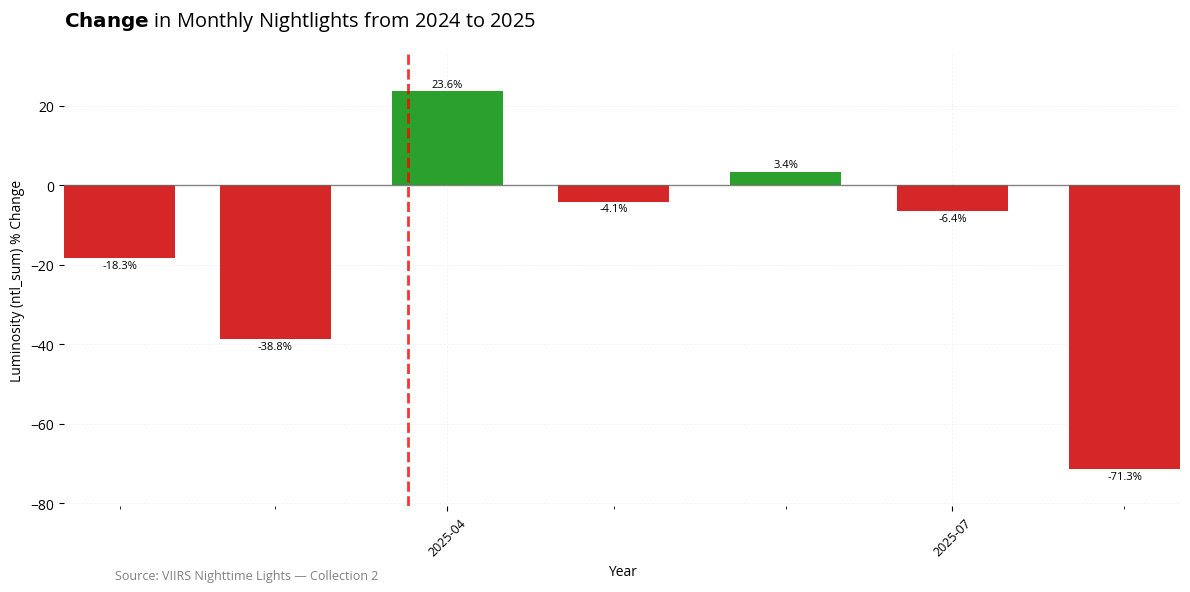

In [276]:
plot_bar_chart(
    df=monthly_yoy[monthly_yoy['date'] >'2025-01-01'],
    x_col='date',  # Use year column directly instead of date
    value_col='pct_change',
    title='Change in Monthly Nightlights from 2024 to 2025',
    xlabel='Year',
    ylabel='Luminosity (ntl_sum) % Change',
    earthquake_marker='2025-03-25',
    date_col=None,  # No date column needed
    bar_width=20,  # Use relative width instead of absolute
    is_percentage=True,
)

In [277]:
earthquake_impact = pd.read_excel('../../../data/MMR_EQ_GRADE_damage_results_Ditte_042325.xlsx')
earthquake_impact.dropna(subset='Region', inplace=True)
earthquake_impact.shape
earthquake_impact.sort_values(by='TOTAL_DMG', inplace=True, ascending=False)
most_impacted_regions = earthquake_impact['State/Region Pcode'].head(6)
least_impacted_regions = earthquake_impact['State/Region Pcode'].tail(12)

In [278]:
most_impacted_regions = ntl_annual_adm1[(ntl_annual_adm1['ADM1_PCODE'].isin(most_impacted_regions))|(ntl_annual_adm1['ADM1_ALTPC'].isin(most_impacted_regions))]['ADM1_EN'].unique()
least_impacted_regions = ntl_annual_adm1[(ntl_annual_adm1['ADM1_PCODE'].isin(least_impacted_regions))|(ntl_annual_adm1['ADM1_ALTPC'].isin(least_impacted_regions))]['ADM1_EN'].unique()

## Trends in Earthquake Impacted Regions


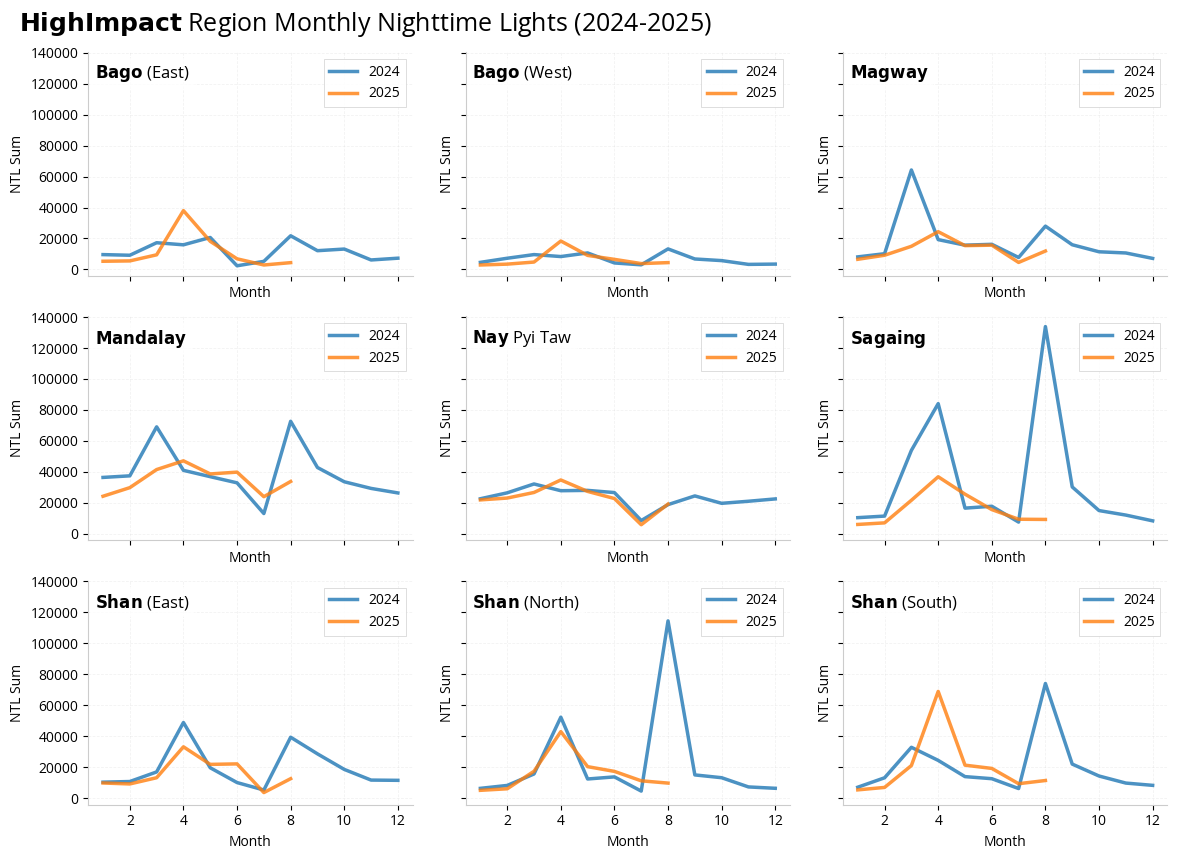

In [279]:

ntl_monthly_adm1['date'] = pd.to_datetime(ntl_monthly_adm1['date'])
ntl_monthly_adm1['year_col'] = ntl_monthly_adm1['date'].dt.year
ntl_monthly_adm1['month'] = ntl_monthly_adm1['date'].dt.month

# Filter for 2024-2025 comparison and top 6 regions
top_regions = ntl_annual_adm1[ntl_annual_adm1['ADM1_EN'].isin(most_impacted_regions)]['ADM1_EN'].unique()
ntl_regional_comparison = ntl_monthly_adm1[
    (ntl_monthly_adm1['ADM1_EN'].isin(top_regions)) & 
    (ntl_monthly_adm1['year_col'].isin([2024, 2025]))
].copy()

ntl_regional_comparison['year_col'] = ntl_regional_comparison['year_col'].astype(str)

plot_comparative_lines_subplots(
    df=ntl_regional_comparison,
    category_col='ADM1_EN',  # Create subplots for each region
    x_col='month',           # X-axis: month
    value_col='ntl_sum',     # Y-axis: NTL sum  
    group_col='year_col',    # Different lines for different years (2024 vs 2025)
    title='HighImpact Region Monthly Nighttime Lights (2024-2025)',
    xlabel='Month',
    ylabel='NTL Sum',
    date_col='date',
    ncols=3,                 # 3 columns of subplots
    figsize_per_subplot=(4, 3),
    linewidth=2.5,
    marker_size=0,
    colors=['#1f77b4', '#ff7f0e']  # Blue for 2024, Orange for 2025
);

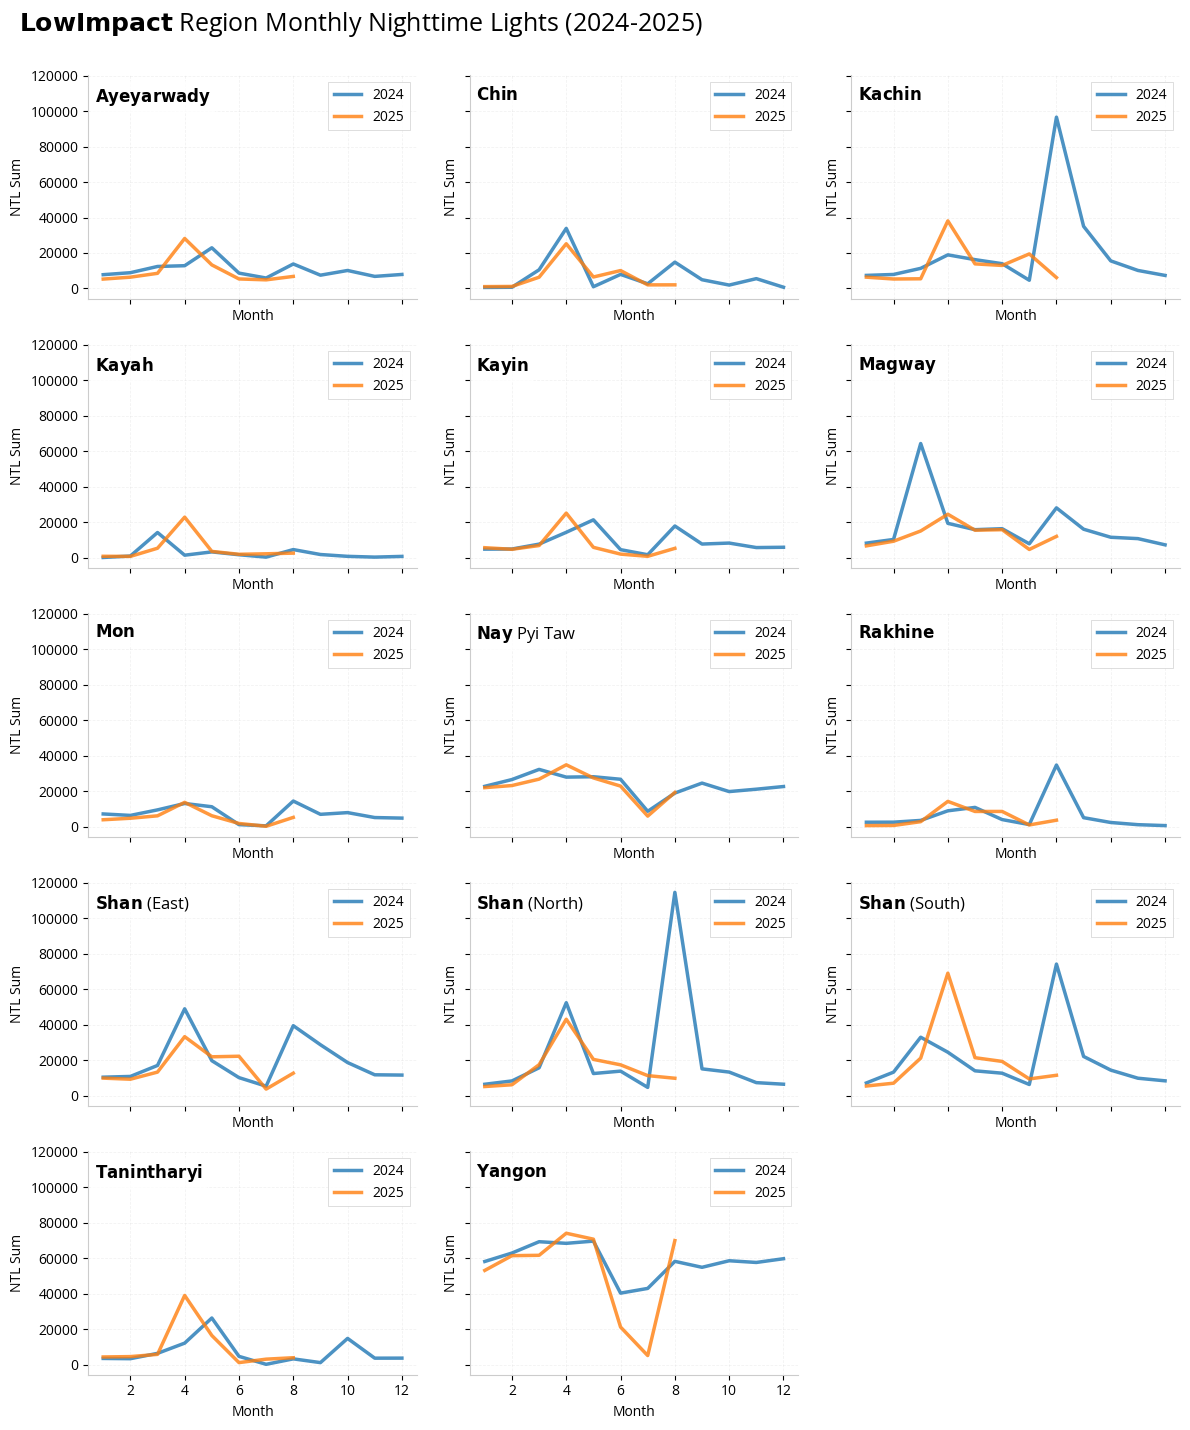

In [280]:
bottom_regions = ntl_annual_adm1[ntl_annual_adm1['ADM1_EN'].isin(least_impacted_regions)]['ADM1_EN'].unique()
ntl_regional_comparison = ntl_monthly_adm1[
    (ntl_monthly_adm1['ADM1_EN'].isin(bottom_regions)) & 
    (ntl_monthly_adm1['year_col'].isin([2024, 2025]))
].copy()

ntl_regional_comparison['year_col'] = ntl_regional_comparison['year_col'].astype(str)

plot_comparative_lines_subplots(
    df=ntl_regional_comparison,
    category_col='ADM1_EN',  # Create subplots for each region
    x_col='month',           # X-axis: month
    value_col='ntl_sum',     # Y-axis: NTL sum  
    group_col='year_col',    # Different lines for different years (2024 vs 2025)
    title='LowImpact Region Monthly Nighttime Lights (2024-2025)',
    xlabel='Month',
    ylabel='NTL Sum',
    date_col='date',
    ncols=3,                 # 3 columns of subplots
    figsize_per_subplot=(4, 3),
    linewidth=2.5,
    marker_size=0,
    colors=['#1f77b4', '#ff7f0e'],  # Blue for 2024, Orange for 2025
    #earthquake_marker=3
);

## Nighttime Lights in Industrial Zones

In [281]:
mmr_adm0 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm0_250k_mimu_20240215.shp')
mmr_adm1 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm1_250k_mimu_20240215.shp')
mmr_adm2 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm2_250k_mimu_20240215.shp')
mmr_adm3 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm3_250k_mimu_20240215.shp')
mmr_adm4 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm4_250k_mimu_20240215.shp')

In [282]:
industrial_zones = gpd.read_file('../../../data/boundaries/industrial__special_economic_zones_sept2019.shp')
industrial_zones = industrial_zones.sjoin(mmr_adm3[['ADM1_PCODE','ADM1_EN','ADM2_EN', 'ADM2_PCODE','ADM3_EN','ADM3_PCODE','geometry']])

In [283]:
# Myitkyina Industrial Quarter and Pakokku Industrial Zone have been repeated twice and the points are very close to each other
industrial_zones = industrial_zones[['Name', 'Type', 'ST', 'ST_PCODE', 'ST_RG', 'ADM1_PCODE', 'ADM1_EN', 'ADM2_EN',
       'ADM2_PCODE', 'ADM3_EN', 'ADM3_PCODE']].drop_duplicates()

In [284]:
ntl_ind_monthly = ntl_ind_monthly.groupby(['Name', 'Type', 'ST', 'ST_PCODE','date'])[['ntl_sum', 'ntl_mean']].max().reset_index()

In [285]:
ntl_ind_monthly = ntl_ind_monthly.merge(industrial_zones[['ADM1_PCODE', 'Name', 'ADM1_EN', 'ADM2_PCODE', 'ADM3_PCODE', 'ADM2_EN', 'ADM3_EN', 'ST_PCODE']], on=['Name', 'ST_PCODE'])

In [286]:
ntl_ind_adm2_monthly = ntl_ind_monthly.groupby(['ADM2_PCODE', 'ADM2_EN', 'date'])[['ntl_sum']].sum().reset_index()
ntl_ind_adm1_monthly = ntl_ind_monthly.groupby(['ADM1_PCODE', 'ADM1_EN', 'date'])[['ntl_sum']].sum().reset_index()

In [287]:
admin2_industrial = ntl_ind_adm2_monthly.groupby(['ADM2_PCODE', 'ADM2_EN']).sum().reset_index()['ADM2_EN'].unique()
admin1_industrial = ntl_ind_adm1_monthly.groupby(['ADM1_PCODE', 'ADM1_EN']).sum().reset_index()['ADM1_EN'].unique()

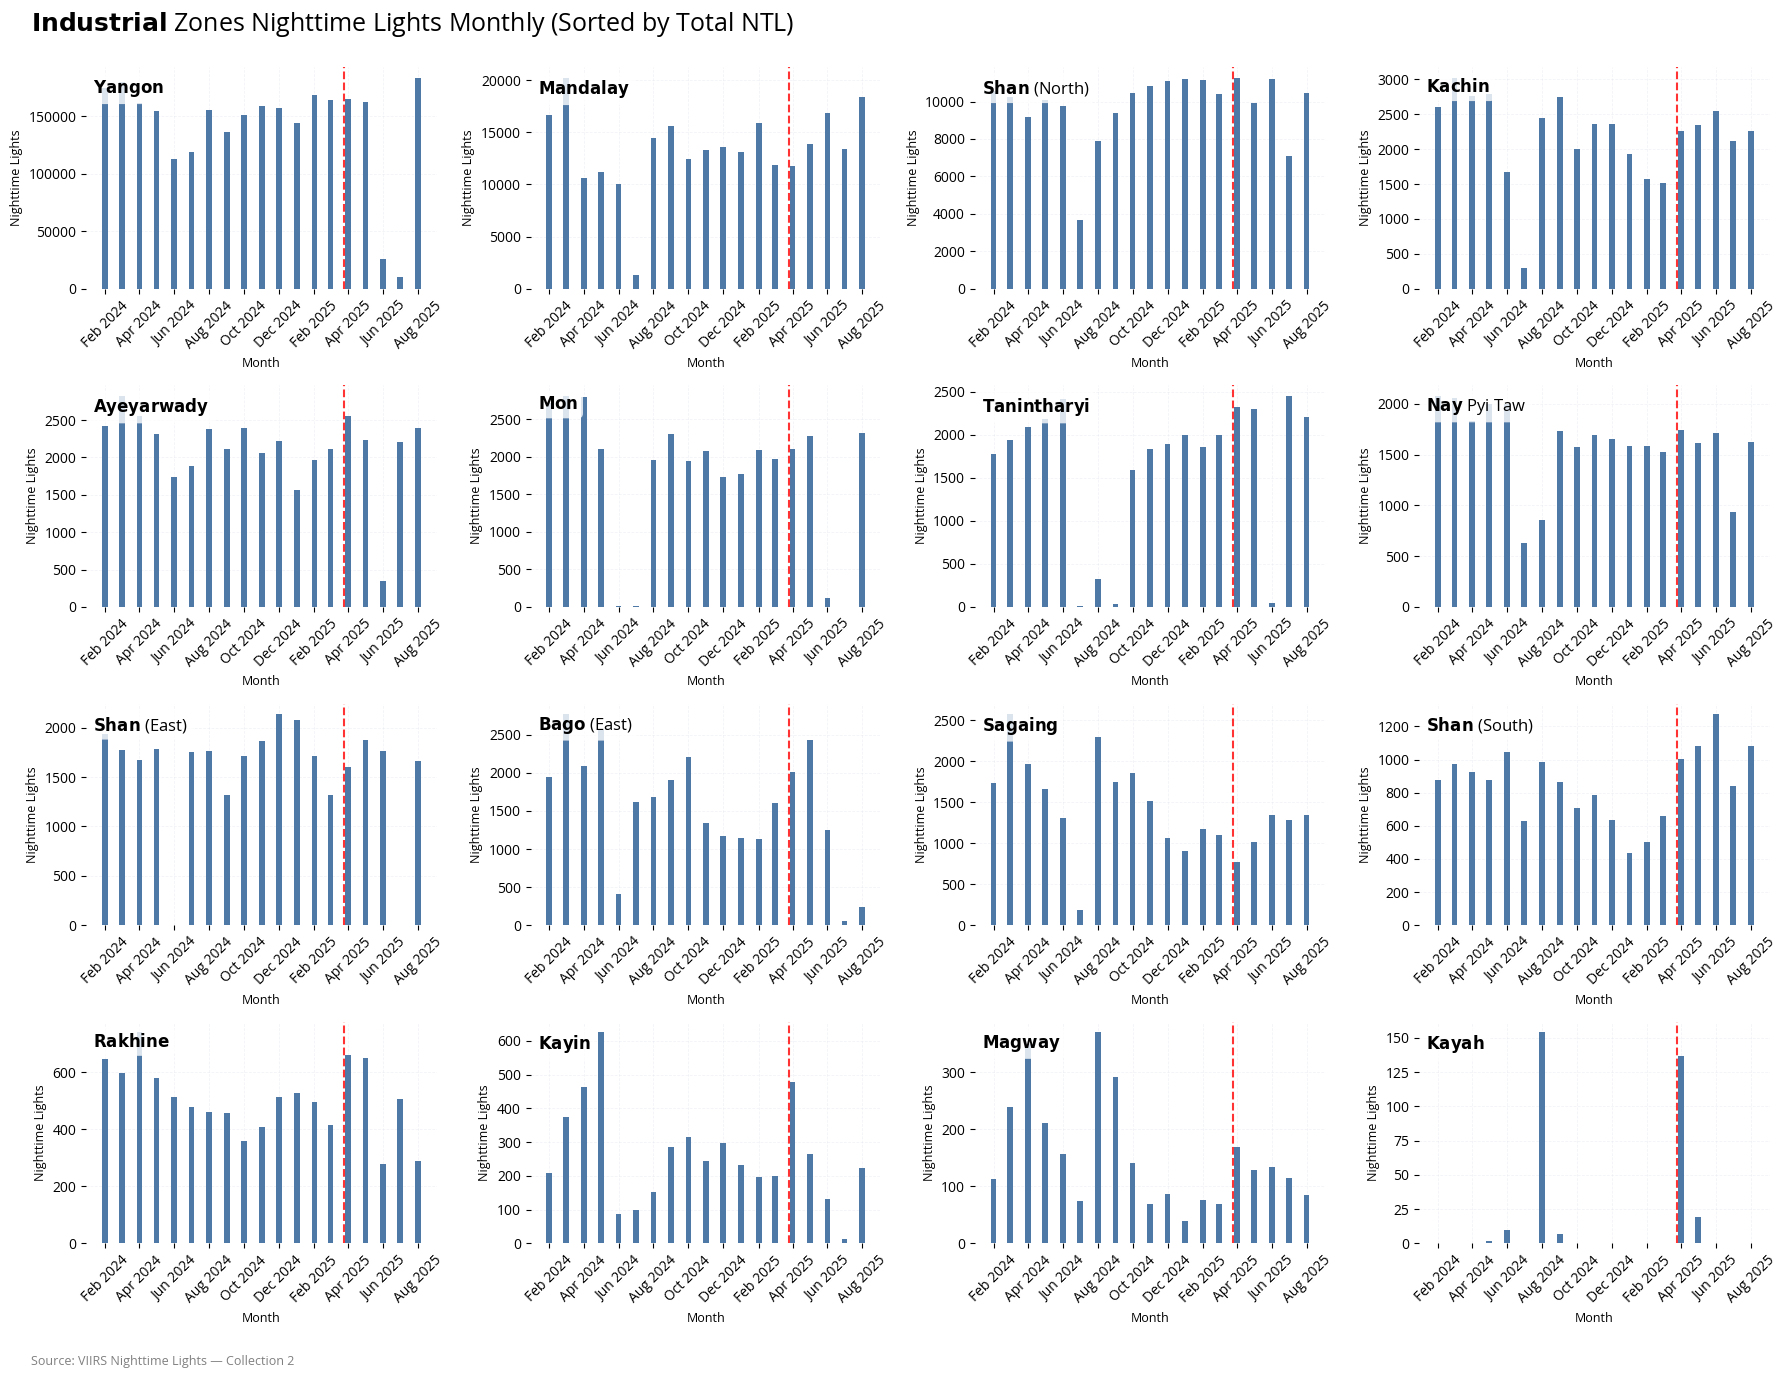

In [297]:
df = ntl_ind_adm1_monthly[ntl_ind_adm1_monthly['ADM1_EN'].isin(admin1_industrial)]
df = df[df['date']>'2024-01-01']

# Sort the dataframe by the same order as the grouped totals
region_totals = df.groupby(['ADM1_PCODE', 'ADM1_EN'])['ntl_sum'].sum().reset_index().sort_values(by='ntl_sum', ascending=False)
region_order_list = region_totals['ADM1_EN'].tolist()


# Convert ADM1_EN to categorical with the sorted order for proper plotting order
df['ADM1_EN'] = pd.Categorical(df['ADM1_EN'], categories=region_order_list, ordered=True)
df = df.sort_values(['ADM1_EN', 'date'])

plot_subplots_bar_charts(
    df,  # Use the sorted dataframe
    x_col='date',
    value_col='ntl_sum',
    group_col='ADM1_EN',
    title='Industrial Zones Nighttime Lights Monthly (Sorted by Total NTL)',
    xlabel='Month',
    ylabel='Nighttime Lights',
    share_axes=False,
    bar_width=10,
    earthquake_marker='2025-03-25'  # Add earthquake marker
)

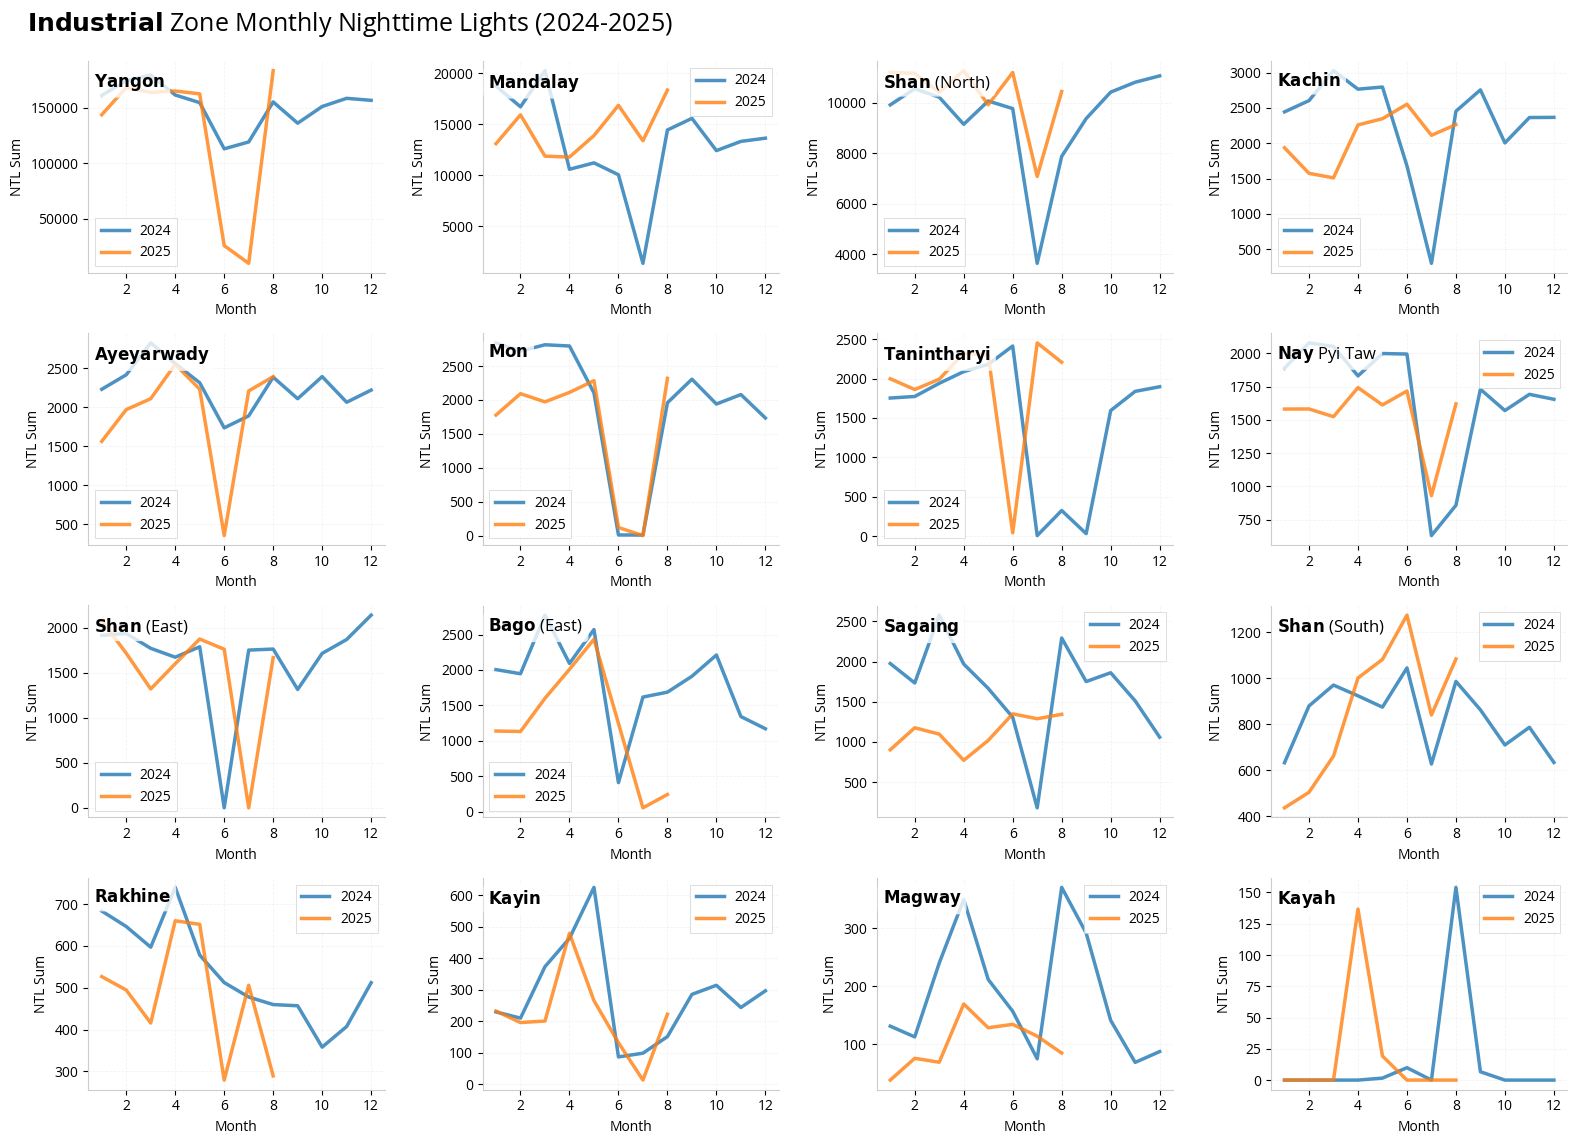

In [289]:

ntl_ind_adm1_monthly['date'] = pd.to_datetime(ntl_ind_adm1_monthly['date'])
ntl_ind_adm1_monthly['year_col'] = ntl_ind_adm1_monthly['date'].dt.year
ntl_ind_adm1_monthly['month'] = ntl_ind_adm1_monthly['date'].dt.month

# Filter for 2024-2025 comparison and top 6 regions
top_regions = ntl_annual_adm1[ntl_annual_adm1['ADM1_PCODE'].isin(most_impacted_regions)]['ADM1_EN'].unique()
ntl_regional_comparison = ntl_ind_adm1_monthly[
    #(ntl_ind_adm1_monthly['ADM1_EN'].isin(top_regions)) & 
    (ntl_ind_adm1_monthly['year_col'].isin([2024, 2025]))
].copy()

ntl_regional_comparison['year_col'] = ntl_regional_comparison['year_col'].astype(str)

ntl_regional_comparison['ADM1_EN'] = pd.Categorical(ntl_regional_comparison['ADM1_EN'], categories=region_order_list, ordered=True)
ntl_regional_comparison = ntl_regional_comparison.sort_values(['ADM1_EN', 'date'])

plot_comparative_lines_subplots(
    df=ntl_regional_comparison,
    category_col='ADM1_EN',  # Create subplots for each region
    x_col='month',           # X-axis: month
    value_col='ntl_sum',     # Y-axis: NTL sum  
    group_col='year_col',    # Different lines for different years (2024 vs 2025)
    title='Industrial Zone Monthly Nighttime Lights (2024-2025)',
    xlabel='Month',
    ylabel='NTL Sum',
    date_col='date',
    ncols=4,                 # 3 columns of subplots
    figsize_per_subplot=(4, 3),
    linewidth=2.5,
    marker_size=0,
    colors=['#1f77b4', '#ff7f0e'],  # Blue for 2024, Orange for 2025
    share_axes=False,
    #fig_size=(15, 10)
);

In [290]:
# from utils import * 
# pc_adm4 = subnational_pct_change(ntl_monthly_agg_adm4, 
#                        region_col='ADM4_PCODE', 
#                        baseline_year=2024, 
#                        current_year=2025,
#                        mode='baseline', 
#                        value_col='ntl_sum')[['ADM4_PCODE','baseline_year', 'current_year', 'current_value', 'pct_change']]

# pc_adm3 = subnational_pct_change(ntl_monthly_agg_adm3, 
#                        region_col='ADM3_PCODE', 
#                        baseline_year=2024, 
#                        current_year=2025,
#                        mode='baseline', 
#                        value_col='ntl_sum')[['ADM3_PCODE','baseline_year', 'current_year', 'current_value', 'pct_change']]
# pc_adm3 = mmr_adm3[['ADM3_EN', 'geometry', 'ADM3_PCODE']].merge(pc_adm3, on='ADM3_PCODE', how='inner')

In [291]:
def get_categories(date):
    if pd.Timestamp('2025-03-01') <= date <= pd.Timestamp('2025-04-30'):
        return 'Mar-Apr 2025 (Earthquake Period)'
    elif pd.Timestamp('2025-01-01') <= date <= pd.Timestamp('2025-02-28'):
        return 'Jan-Feb 2025 (Pre-Earthquake Period)'
    elif pd.Timestamp('2025-05-01') <= date <= pd.Timestamp('2025-06-30'):
        return 'May-Jun 2025 (Post-Earthquake Period)'
    elif pd.Timestamp('2025-07-01') <= date <= pd.Timestamp('2025-08-30'):
        return 'Jul-Aug 2025 (Recovery Period)'
    else:
        return None  # Return None for dates outside these periods


In [292]:
ntl_monthly_adm1['date'] = pd.to_datetime(ntl_monthly_adm1['date'])
ntl_monthly_adm1['category'] = ntl_monthly_adm1['date'].apply(get_categories)

ntl_earthquake_period = ntl_monthly_adm1.groupby(['ADM1_PCODE', 'ADM1_EN', 'category'])['ntl_sum'].sum().reset_index()

In [293]:
ntl_earthquake_period = mmr_adm1[['ADM1_EN', 'ADM1_PCODE', 'geometry']].merge(ntl_earthquake_period, on=['ADM1_PCODE', 'ADM1_EN'], how='inner')

## Spatial Distribution of Nighttime Lights



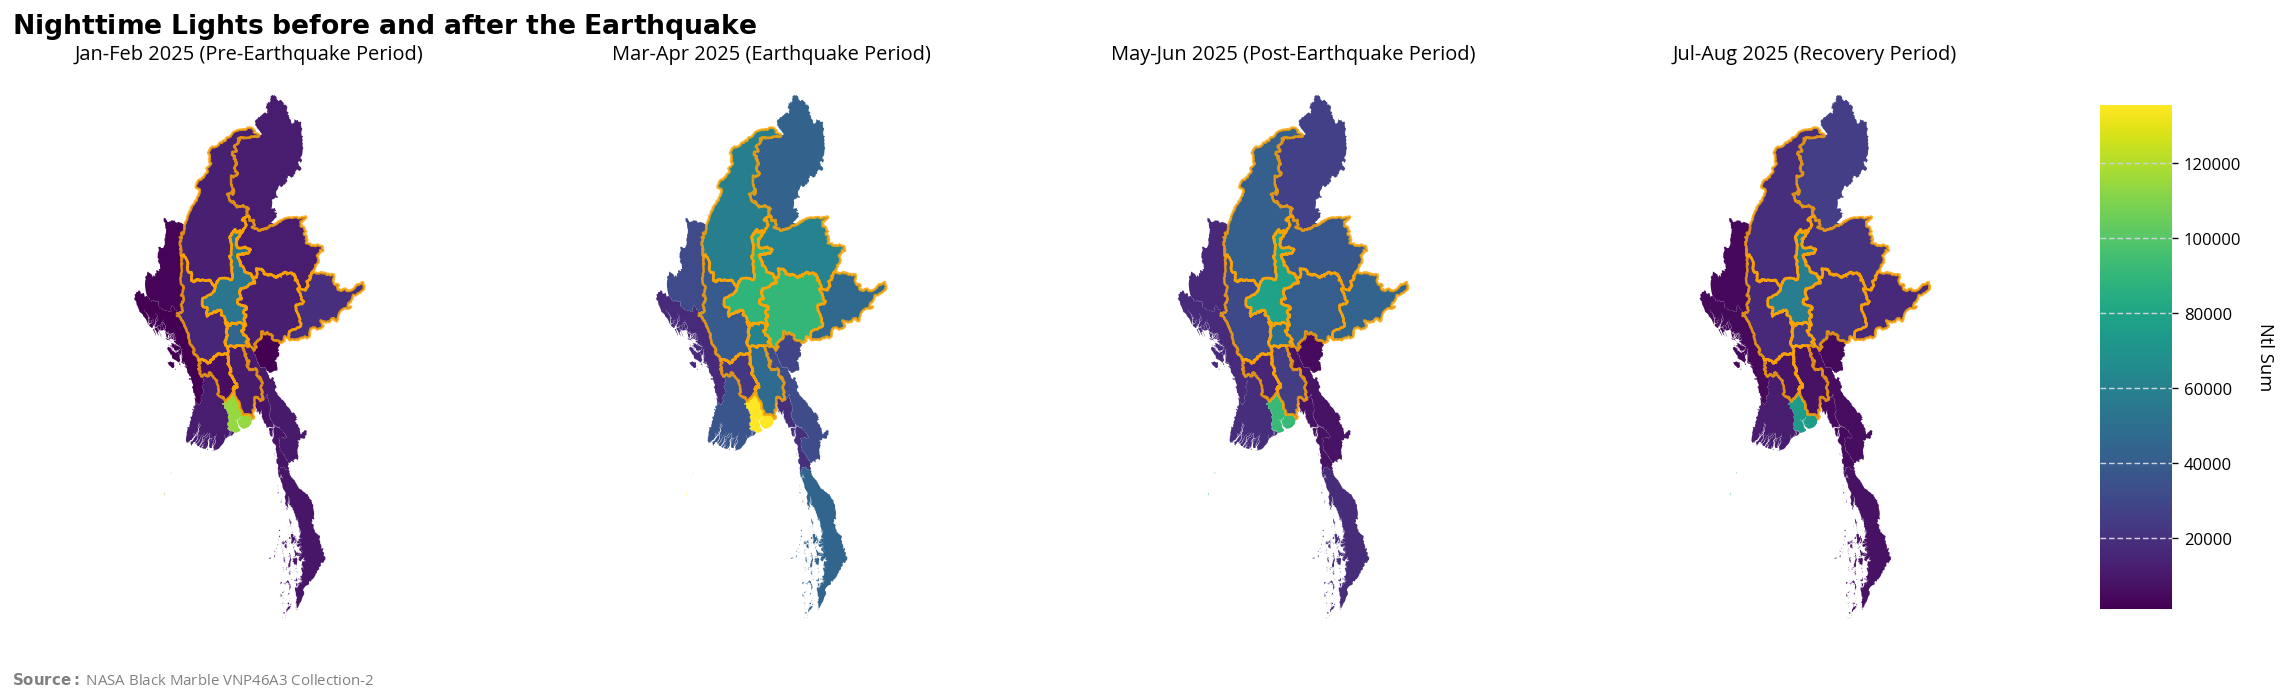

In [294]:
# Sort the earthquake period data by the chronological order of periods
period_order = [
    'Jan-Feb 2025 (Pre-Earthquake Period)',
    'Mar-Apr 2025 (Earthquake Period)', 
    'May-Jun 2025 (Post-Earthquake Period)',
    'Jul-Aug 2025 (Recovery Period)'
]

# Filter out any None categories and ensure proper ordering
ntl_earthquake_sorted = ntl_earthquake_period[ntl_earthquake_period['category'].notna()].copy()
ntl_earthquake_sorted['category'] = pd.Categorical(ntl_earthquake_sorted['category'], 
                                                 categories=period_order, 
                                                 ordered=True)
ntl_earthquake_sorted = ntl_earthquake_sorted.sort_values('category')

# Plot maps split by earthquake period categories using the new function
plot_maps_by_category(
    gdf=ntl_earthquake_sorted,
    category_col='category',  # Split by the earthquake period categories
    value_col='ntl_sum',      # Map the NTL sum values
    cmap='viridis',
    figsize=(20, 6),
    ncols=4,
    suptitle='$\\mathbf{Nighttime\\ Lights\\ before\\ and\\ after\\ the\\ Earthquake}$',
    source_text='$\\mathbf{Source:}$ NASA Black Marble VNP46A3 Collection-2',
    legend=True,
    boundary_gdf=mmr_adm1[mmr_adm1['ADM1_EN'].isin(most_impacted_regions)],  # Use country boundary instead
    boundary_kwargs={'color': 'orange', 'linewidth': 1.5, 'alpha': 0.8}  # Boundary styling
)

In [295]:
ntl_daily = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm1_daily*.csv')):
    df = pd.read_csv(file)
    ntl_daily = pd.concat([ntl_daily, df], ignore_index=True)

In [298]:
# ntl_daily['date'] = pd.to_datetime(ntl_daily['date'])
# ntl_daily = ntl_daily.groupby([pd.Grouper(key='date', freq='MS'), 'ADM1_EN'])['ntl_sum'].sum().reset_index()

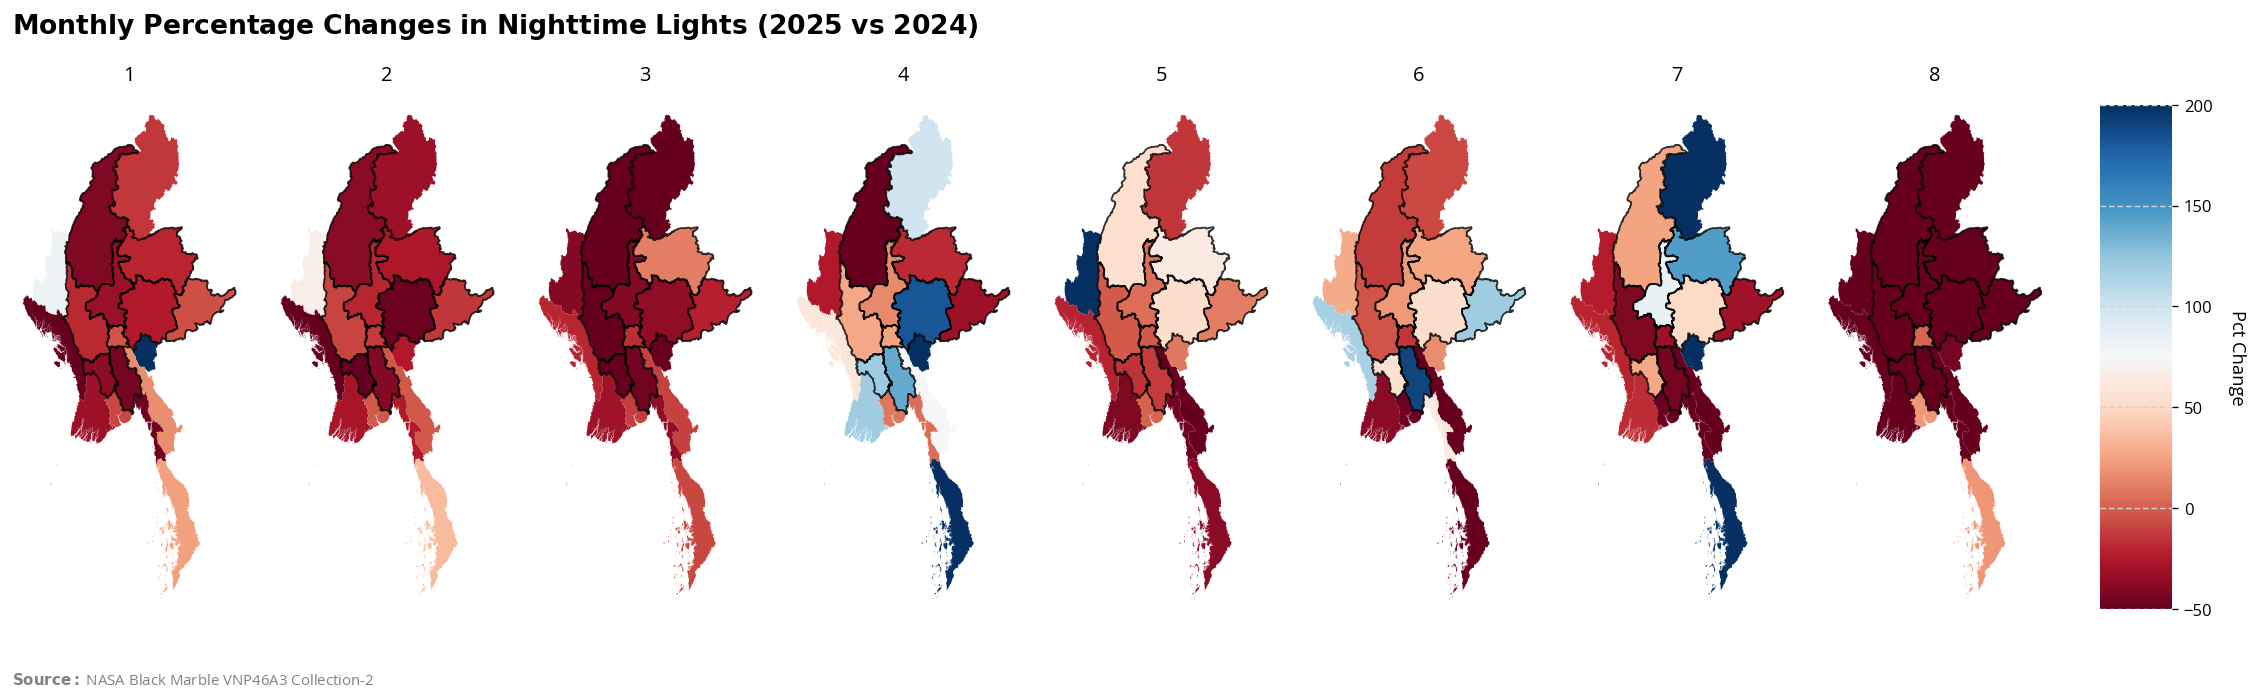

In [304]:



monthly_pct_changes = subnational_monthly_pct_change(
    df=ntl_monthly_adm1,
    region_col='ADM1_EN',
    baseline_year=2024,
    current_year=2025,
    date_col='date'
)
monthly_pct_changes = mmr_adm1[['ADM1_EN', 'geometry']].merge(monthly_pct_changes, 
               on='ADM1_EN', 
               how='inner')


plot_maps_by_category(
    gdf=monthly_pct_changes,
    category_col='month',  
    value_col='pct_change',      
    cmap='RdBu',  # Red-Blue colormap, reversed (red=negative, blue=positive)
    figsize=(20, 6),
    ncols=8,
    suptitle='$\\mathbf{Monthly\\ Percentage\\ Changes\\ in\\ Nighttime\\ Lights\\ (2025\\ vs\\ 2024)}$',
    source_text='$\\mathbf{Source:}$ NASA Black Marble VNP46A3 Collection-2',
    legend=True,
    vmin=-50,  # Cap at -50% 
    vmax=200,  # Cap at +200%
    boundary_gdf=mmr_adm1[mmr_adm1['ADM1_EN'].isin(most_impacted_regions)],
    boundary_kwargs={'color': 'black', 'linewidth': 1.0, 'alpha': 0.8}
)

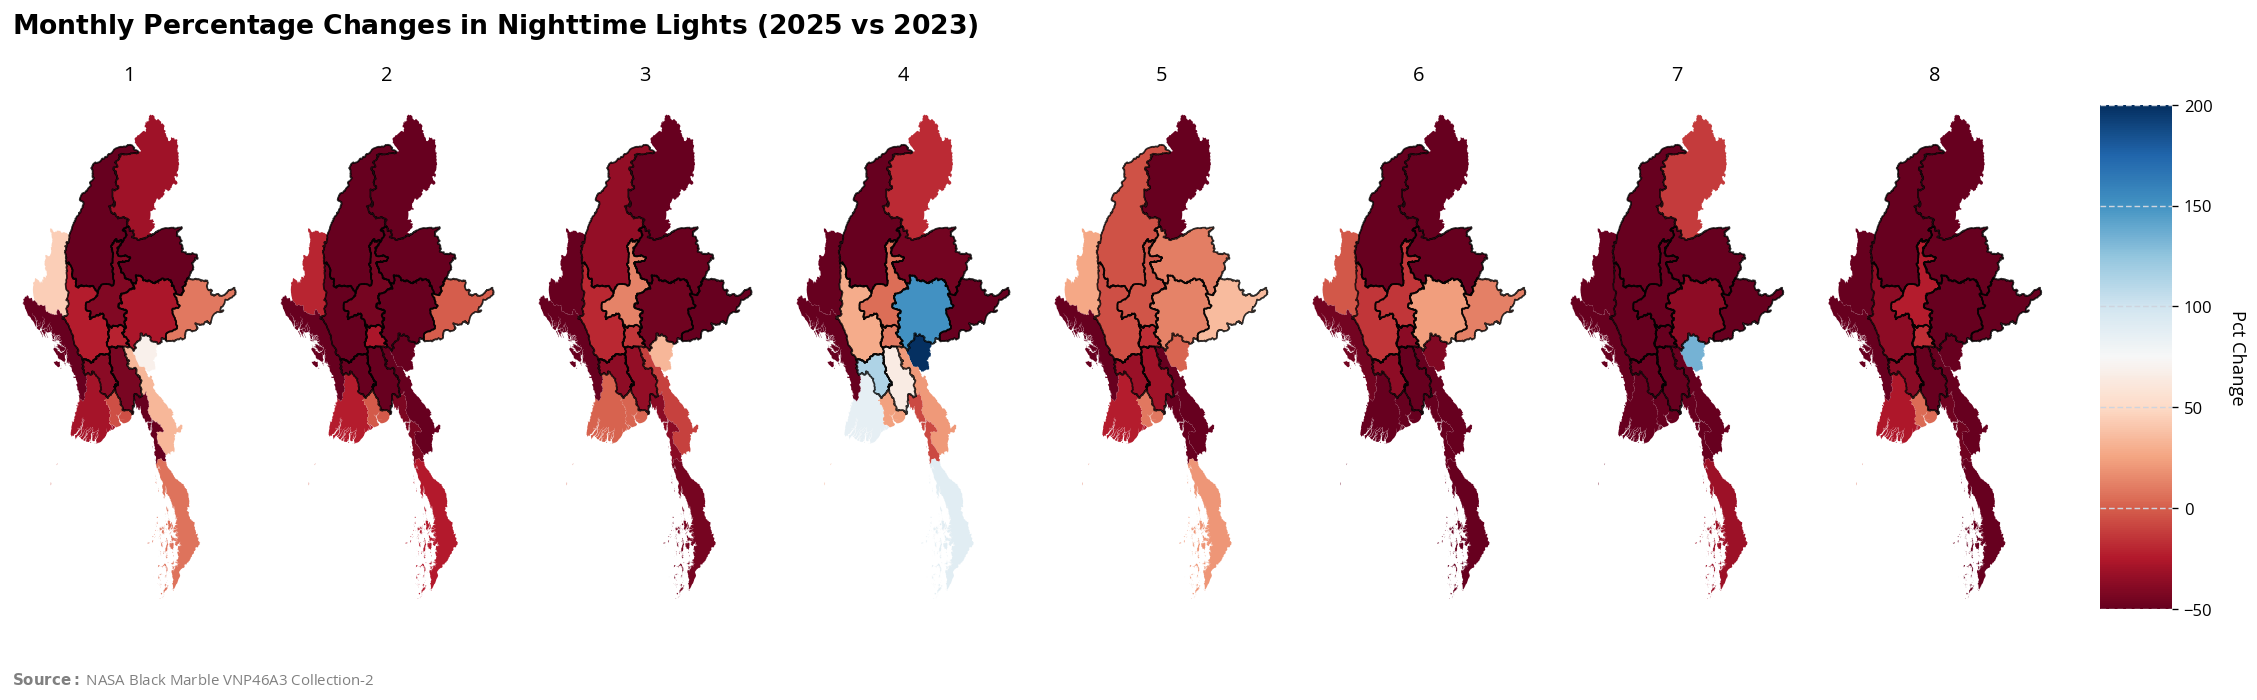

In [305]:



monthly_pct_changes = subnational_monthly_pct_change(
    df=ntl_monthly_adm1,
    region_col='ADM1_EN',
    baseline_year=2023,
    current_year=2025,
    date_col='date'
)
monthly_pct_changes = mmr_adm1[['ADM1_EN', 'geometry']].merge(monthly_pct_changes, 
               on='ADM1_EN', 
               how='inner')


plot_maps_by_category(
    gdf=monthly_pct_changes,
    category_col='month',  
    value_col='pct_change',      
    cmap='RdBu',  # Red-Blue colormap, reversed (red=negative, blue=positive)
    figsize=(20, 6),
    ncols=8,
    suptitle='$\\mathbf{Monthly\\ Percentage\\ Changes\\ in\\ Nighttime\\ Lights\\ (2025\\ vs\\ 2023)}$',
    source_text='$\\mathbf{Source:}$ NASA Black Marble VNP46A3 Collection-2',
    legend=True,
    vmin=-50,  # Cap at -50% 
    vmax=200,  # Cap at +200%
    boundary_gdf=mmr_adm1[mmr_adm1['ADM1_EN'].isin(most_impacted_regions)],
    boundary_kwargs={'color': 'black', 'linewidth': 1.0, 'alpha': 0.8}
)

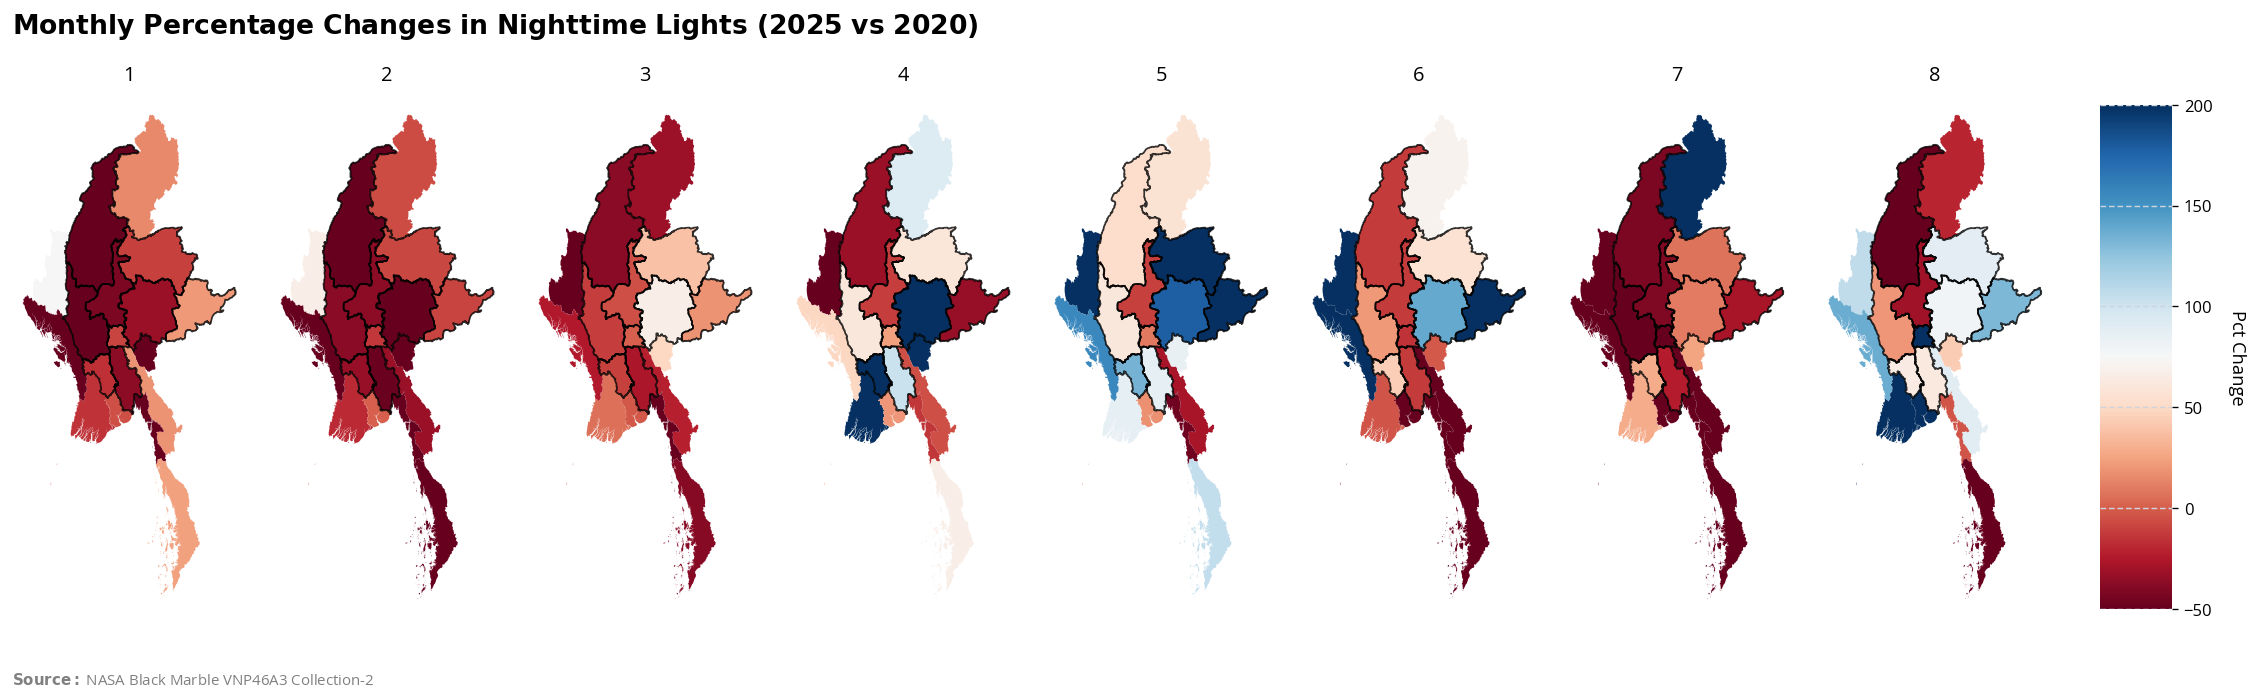

In [311]:



monthly_pct_changes = subnational_monthly_pct_change(
    df=ntl_monthly_adm1,
    region_col='ADM1_EN',
    baseline_year=2020,
    current_year=2025,
    date_col='date'
)
monthly_pct_changes = mmr_adm1[['ADM1_EN', 'geometry']].merge(monthly_pct_changes, 
               on='ADM1_EN', 
               how='inner')


plot_maps_by_category(
    gdf=monthly_pct_changes,
    category_col='month',  
    value_col='pct_change',      
    cmap='RdBu',  # Red-Blue colormap, reversed (red=negative, blue=positive)
    figsize=(20, 6),
    ncols=8,
    suptitle='$\\mathbf{Monthly\\ Percentage\\ Changes\\ in\\ Nighttime\\ Lights\\ (2025\\ vs\\ 2020)}$',
    source_text='$\\mathbf{Source:}$ NASA Black Marble VNP46A3 Collection-2',
    legend=True,
    vmin=-50,  # Cap at -50% 
    vmax=200,  # Cap at +200%
    boundary_gdf=mmr_adm1[mmr_adm1['ADM1_EN'].isin(most_impacted_regions)],
    boundary_kwargs={'color': 'black', 'linewidth': 1.0, 'alpha': 0.8}
)

In [ ]:
# ntl_annual_adm0.to_csv('../../../data/ntl/collection2/processed/ntl_annual_adm0_collection2.csv')
# ntl_annual_adm1.to_csv('../../../data/ntl/collection2/processed/ntl_annual_adm1_collection2.csv')
# ntl_annual_adm2.to_csv('../../../data/ntl/collection2/processed/ntl_annual_adm2_collection2.csv')
# ntl_annual_adm3.to_csv('../../../data/ntl/collection2/processed/ntl_annual_adm3_collection2.csv')
# ntl_annual_adm4.to_csv('../../../data/ntl/collection2/processed/ntl_annual_adm4_collection2.csv')

# ntl_monthly_adm0.to_csv('../../../data/ntl/collection2/processed/ntl_monthly_adm0_collection2.csv')
# ntl_monthly_adm1.to_csv('../../../data/ntl/collection2/processed/ntl_monthly_adm1_collection2.csv')
# ntl_monthly_adm2.to_csv('../../../data/ntl/collection2/processed/ntl_monthly_adm2_collection2.csv')
# ntl_monthly_adm3.to_csv('../../../data/ntl/collection2/processed/ntl_monthly_adm3_collection2.csv')
# ntl_monthly_adm4.to_csv('../../../data/ntl/collection2/processed/ntl_monthly_adm4_collection2.csv')
